In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import os as os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/AutismDataset'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import os
import cv2
import imghdr

# List of valid image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Directory containing the dataset
data_dir = '/content/drive/MyDrive/AutismDataset'

# Iterate over each class directory in the dataset
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    # Ensure we are only processing directories
    if os.path.isdir(class_dir):
        # Iterate over each image file in the class directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                # Ensure we are only processing files, not directories
                if os.path.isfile(image_path):
                    img = cv2.imread(image_path)
                    tip = imghdr.what(image_path)
                    if tip not in image_exts:
                        print(f'Image not in ext list: {image_path}')
                        os.remove(image_path)
            except Exception as e:
                print(f'Issue with image: {image_path}')

# Verify the contents of the dataset directory
print(os.listdir(data_dir))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['valid', 'consolidated', 'test', 'train']


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AutismDataset/train')

Found 2626 files belonging to 2 classes.


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

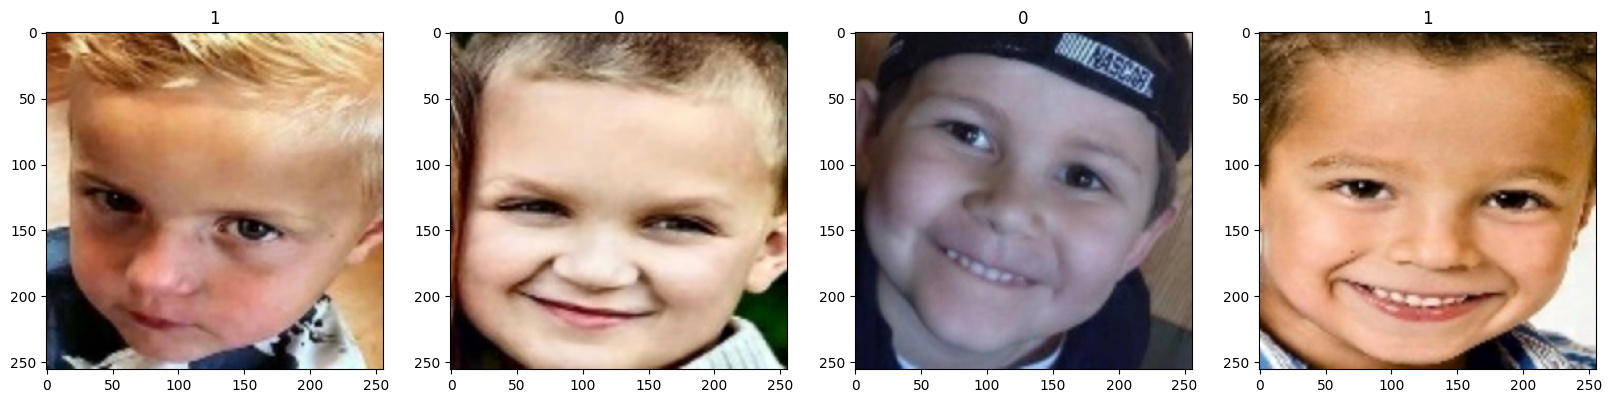

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.99215686, 0.90588236, 0.8627451 ],
          [0.9941176 , 0.9078431 , 0.8617647 ],
          [0.9980392 , 0.9117647 , 0.8598039 ],
          ...,
          [0.2647059 , 0.17843138, 0.12352941],
          [0.2372549 , 0.1509804 , 0.09607843],
          [0.22352941, 0.13725491, 0.08235294]],
 
         [[0.9882353 , 0.9009804 , 0.85490197],
          [0.98970586, 0.9017157 , 0.85269606],
          [0.99264705, 0.90318626, 0.8482843 ],
          ...,
          [0.27450982, 0.1882353 , 0.13333334],
          [0.24705882, 0.16078432, 0.10588235],
          [0.23333333, 0.14705883, 0.09215686]],
 
         [[0.98039216, 0.89117646, 0.8392157 ],
          [0.98088235, 0.8894608 , 0.83455884],
          [0.9818627 , 0.8860294 , 0.8252451 ],
          ...,
          [0.29411766, 0.20784314, 0.15294118],
          [0.26666668, 0.18039216, 0.1254902 ],
          [0.2529412 , 0.16666667, 0.11176471]],
 
         ...,
 
         [[0.71960783, 0.59411764, 0.37058824],
          [0.72818

In [ ]:
batch[0].max()


255.0

In [ ]:
len(data)

83

In [ ]:
train_size = int(len(data)*.75)+1
val_size = int(len(data)*.15)
test_size = int(len(data)*.1)

In [ ]:
train_size+val_size+test_size

83

In [ ]:
train_size

63

In [ ]:
val_size

12

In [ ]:
test_size

8

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create a Sequential model
model = Sequential()

model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding Dropout for regularization
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Specify learning rate here
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Load your training and validation data using train_datagen

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
# model.fit(...)

# model.summary()  # Optionally print model summary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,905 (14.11 MB)

 Trainable params: 3,697,265 (14.10 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(
    train,
    epochs=50,
    validation_data=val,
    callbacks=[early_stop, reduce_lr])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.6515 - loss: 0.7771 - val_accuracy: 0.4844 - val_loss: 1.1465 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.7505 - loss: 0.5057 - val_accuracy: 0.4818 - val_loss: 1.4855 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.7823 - loss: 0.4528 - val_accuracy: 0.4948 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.8321 - loss: 0.3964 - val_accuracy: 0.4922 - val_loss: 2.0198 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.8735 - loss: 0.3052 - val_accuracy: 0.5156 - val_loss: 1.3296 - learning_rate: 2.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9094 - loss: 0.2558 - val_accuracy: 0.5208 - val_loss: 1.0748 - learning_rate: 2.0000e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.9195 - loss: 0.2323 -

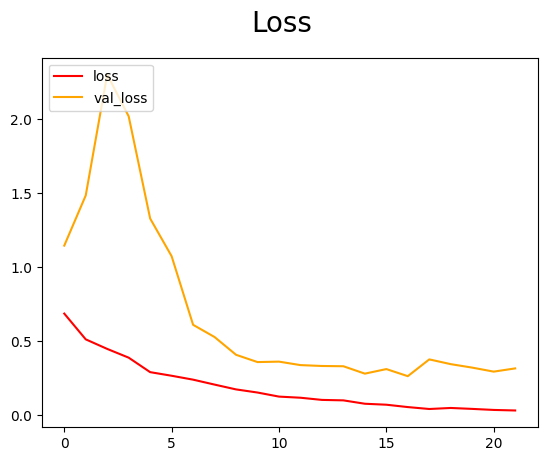

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

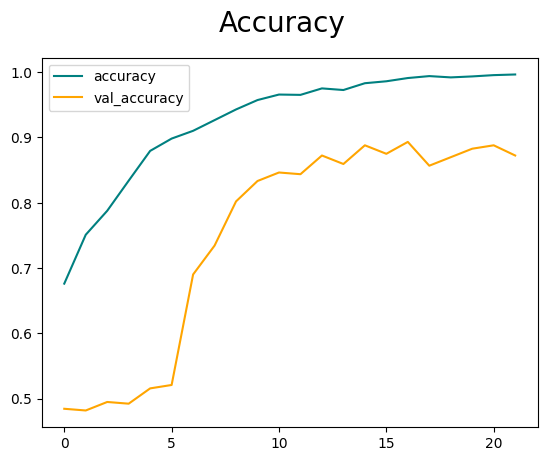

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    z = model.predict(X)
    pre.update_state(y, z)
    re.update_state(y, z)
    acc.update_state(y, z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.83495146, shape=(), dtype=float32) tf.Tensor(0.76785713, shape=(), dtype=float32) tf.Tensor(0.8097345, shape=(), dtype=float32)


In [ ]:
import cv2 as cv2

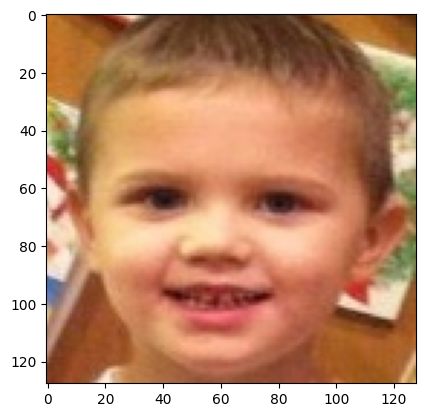

In [ ]:
img = cv2.imread('/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.104.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

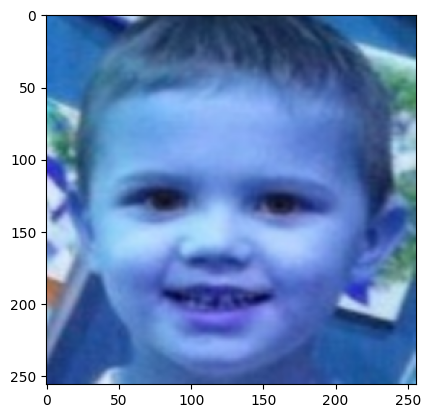

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
z= model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
z

array([[0.00100594]], dtype=float32)

In [ ]:
if z > 0.015:
    print(f'Predicted photo is Not Autistic')
else:
    print(f'Predicted photo is Autistic')

Predicted photo is Autistic


In [ ]:
tf.keras.models.save_model(model,'ASD_Model1.hdf5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


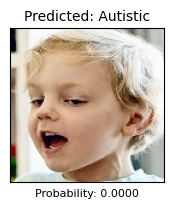

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.10.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability <= 0.015 and probability >0.000 :
        prediction = 'Autistic'
    else:
        prediction = 'Not Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


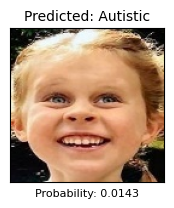

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.146.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability <= 0.015 and probability >0.000 :
        prediction = 'Autistic'
    else:
        prediction = 'Not Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


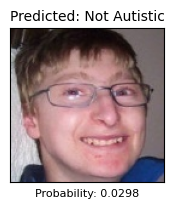

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.129.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability <= 0.015 and probability >0.000 :
        prediction = 'Autistic'
    else:
        prediction = 'Not Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


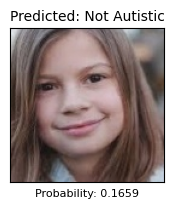

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Non_Autistic/Non_Autistic.70.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability > 0.015:
        prediction = 'Not Autistic'
    else:
        prediction = 'Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.axis('on')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


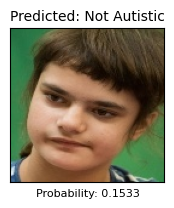

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.103.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability > 0.015:
        prediction = 'Not Autistic'
    else:
        prediction = 'Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


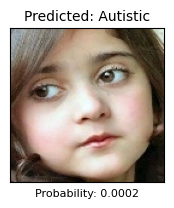

In [ ]:


import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Non_Autistic/Non_Autistic.47.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability > 0.015:
        prediction = 'Not Autistic'
    else:
        prediction = 'Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


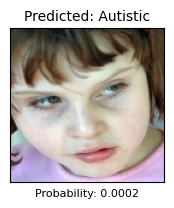

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the imag
img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.19.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability > 0.015:
        prediction = 'Not Autistic'
    else:
        prediction = 'Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


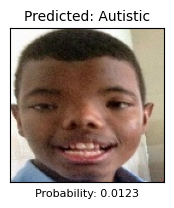

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('ASD_Model1.hdf5')

# Read the image
img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.145.jpg'
img = cv2.imread(img_path)

# Check if image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    # Preprocess the image
    resize = tf.image.resize(img, (256, 256))
    resize = resize / 255.0  # Normalize the image

    # Predict the class and probability
    z = model.predict(np.expand_dims(resize, axis=0))
    probability = z[0][0]

    # Determine the prediction label
    if probability > 0.015:
        prediction = 'Not Autistic'
    else:
        prediction = 'Autistic'

    # Display the image with the prediction and probability
    plt.figure(figsize=(2, 2))  # Adjust figsize to make the image smaller
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {prediction}', fontsize=10)
    plt.xlabel(f'Probability: {probability:.4f}', fontsize=8)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Data generators with augmentation for training set
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

train = datagen.flow_from_directory(
    '/content/drive/MyDrive/AutismDataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val = datagen.flow_from_directory(
    '/content/drive/MyDrive/AutismDataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define the model
base_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Use appropriate activation and output units for your task
])

# Compile the model with precision and recall metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train,
    epochs=50,
    validation_data=val,
    callbacks=[early_stop, reduce_lr]
)

# Evaluate the model
test_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/AutismDataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

results = model.evaluate(test_data)
test_loss, test_accuracy, test_precision, test_recall = results
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2101 images belonging to 2 classes.
Found 525 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 2391s 36s/step - accuracy: 0.4678 - loss: 2.7124 - precision_1: 0.4841 - recall_1: 0.5031 - val_accuracy: 0.6914 - val_loss: 0.7005 - val_precision_1: 0.6647 - val_recall_1: 0.8118 - learning_rate: 1.0000e-04
Epoch 2/50
35/66 ━━━━━━━━━━━━━━━━━━━━ 14:47 29s/step - accuracy: 0.5709 - loss: 1.8113 - precision_1: 0.6135 - recall_1: 0.6379